Facial Beauty Scoring Using Deep Learning: A Computer Vision Approach
By: Christopher Mendoza, Ian Lucas
Date: December 11, 2024

Project Objective:

Develop a machine learning model to predict facial beauty scores based on the SCUT-FBP5500 dataset using deep learning techniques in computer vision.

Dataset: SCUT-FBP5500 dataset from Kaggle

Checking file paths...
Images path exists: True
Labels file exists: True
Listing first 5 files in the 'images' folder:
['CF121.jpg', 'AF1607.jpg', 'AF1161.jpg', 'CM712.jpg', 'AF597.jpg']
Dataset Overview:
   image_name  beauty_score
0   CF437.jpg      2.883333
1  AM1384.jpg      2.466667
2  AM1234.jpg      2.150000
3  AM1774.jpg      3.750000
4   CF215.jpg      3.033333

Total number of images: 5500
Sample image names from the labels file:
0     CF437.jpg
1    AM1384.jpg
2    AM1234.jpg
3    AM1774.jpg
4     CF215.jpg
Name: image_name, dtype: object
Sample Images with Beauty Scores:


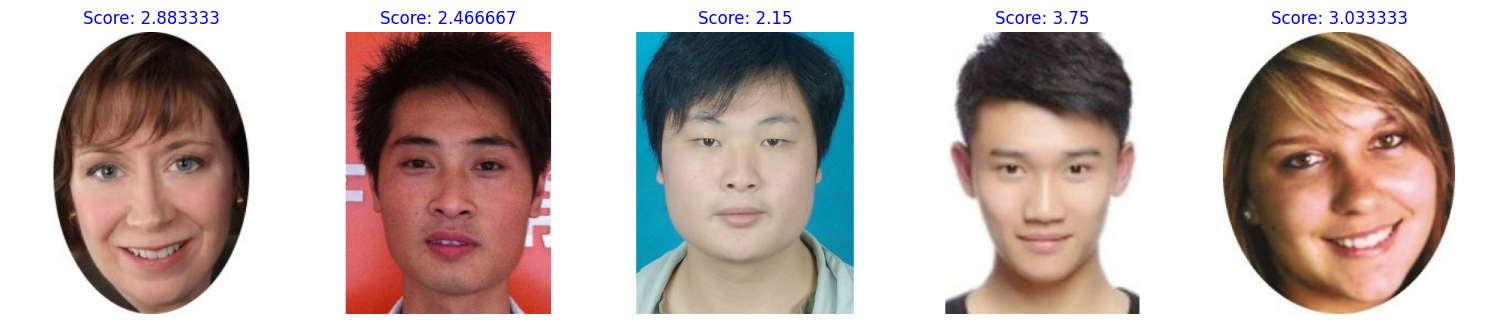

Image Properties:
Processed 100 valid images out of 100 samples.
Average Width: 350.00, Average Height: 350.00
Image Dimensions: Min Width = 350, Max Width = 350
Image Dimensions: Min Height = 350, Max Height = 350


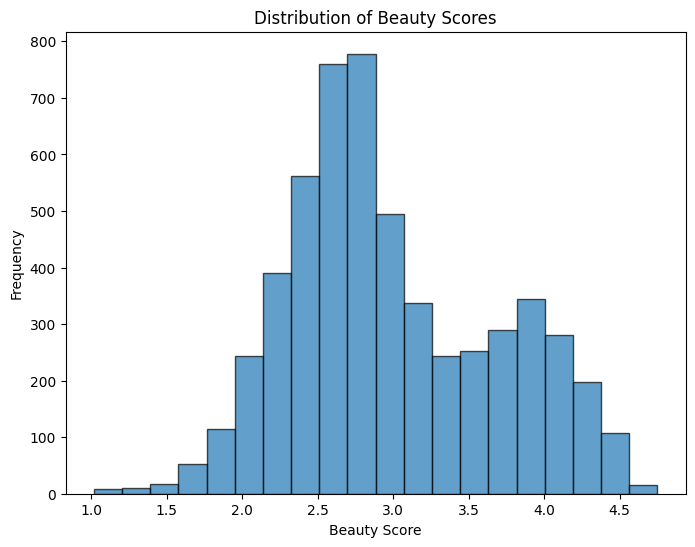

Summary Statistics of Beauty Scores:
Mean Beauty Score: 2.99
Median Beauty Score: 2.83
Standard Deviation: 0.69
Minimum Beauty Score: 1.016667
Maximum Beauty Score: 4.75


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Set the paths for images and labels
IMAGES_PATH = "./Images"  # Path to the 'images' folder
LABELS_FILE = "labels.txt"  # Ensure this matches your labels file location

# Verify the paths
print("Checking file paths...")
print(f"Images path exists: {os.path.exists(IMAGES_PATH)}")
print(f"Labels file exists: {os.path.exists(LABELS_FILE)}")

if os.path.exists(IMAGES_PATH):
    print(f"Listing first 5 files in the 'images' folder:")
    print(os.listdir(IMAGES_PATH)[:5])
else:
    print("Images folder not found! Please check the IMAGES_PATH variable.")

# Load labels
column_names = ["image_name", "beauty_score"]
labels = pd.read_csv(LABELS_FILE, sep=" ", header=None, names=column_names)

# Inspect the data
print("Dataset Overview:")
print(labels.head())
print(f"\nTotal number of images: {len(labels)}")

# Check sample image names from the labels file
print("Sample image names from the labels file:")
print(labels["image_name"].head())

# Function to display images with scores
def display_images_with_scores(image_names, scores, images_path, n=5):
    """
    Display example images with their beauty scores displayed below each image.
    Args:
        image_names (list): List of image filenames.
        scores (list): List of corresponding beauty scores.
        images_path (str): Path to the folder containing images.
        n (int): Number of images to display.
    """
    fig, axes = plt.subplots(1, n, figsize=(15, 5))
    for i, (img_name, score) in enumerate(zip(image_names[:n], scores[:n])):
        img_path = os.path.join(images_path, img_name)
        if os.path.exists(img_path):
            try:
                img = Image.open(img_path)
                axes[i].imshow(img)
                axes[i].axis("off")
                axes[i].set_title(f"Score: {score}", fontsize=12, color="blue")
            except Exception as e:
                axes[i].axis("off")
                axes[i].set_title(f"Error: {e}", fontsize=10, color="red")
        else:
            axes[i].axis("off")
            axes[i].set_title(f"Missing: {img_name}", fontsize=10, color="red")
    plt.tight_layout()
    plt.show()

# Display first 5 images with beauty scores
print("Sample Images with Beauty Scores:")
sample_images = labels["image_name"].values
sample_scores = labels["beauty_score"].values
display_images_with_scores(sample_images, sample_scores, IMAGES_PATH, n=5)

# Function to check image properties
def check_image_properties(images_path, image_names, n=100):
    """Check the dimensions and properties of a sample of images."""
    widths, heights = [], []
    valid_images = 0  # Count of valid images processed
    for img_name in image_names[:n]:
        img_path = os.path.join(images_path, img_name)
        if os.path.exists(img_path):
            try:
                with Image.open(img_path) as img:
                    widths.append(img.width)
                    heights.append(img.height)
                    valid_images += 1
            except Exception as e:
                print(f"Error opening image {img_name}: {e}")
        else:
            print(f"Warning: Image {img_name} not found at {img_path}")
    
    if widths and heights:
        print(f"Processed {valid_images} valid images out of {n} samples.")
        print(f"Average Width: {np.mean(widths):.2f}, Average Height: {np.mean(heights):.2f}")
        print(f"Image Dimensions: Min Width = {min(widths)}, Max Width = {max(widths)}")
        print(f"Image Dimensions: Min Height = {min(heights)}, Max Height = {max(heights)}")
    else:
        print("No valid images found to calculate properties.")

# Check image properties
print("Image Properties:")
check_image_properties(IMAGES_PATH, sample_images)

# Check distribution of beauty scores
plt.figure(figsize=(8, 6))
plt.hist(labels["beauty_score"], bins=20, edgecolor="k", alpha=0.7)
plt.title("Distribution of Beauty Scores")
plt.xlabel("Beauty Score")
plt.ylabel("Frequency")
plt.show()

# Summary Statistics of Beauty Scores
print("Summary Statistics of Beauty Scores:")
mean_score = labels["beauty_score"].mean()
median_score = labels["beauty_score"].median()
std_dev_score = labels["beauty_score"].std()
min_score = labels["beauty_score"].min()
max_score = labels["beauty_score"].max()

print(f"Mean Beauty Score: {mean_score:.2f}")
print(f"Median Beauty Score: {median_score:.2f}")
print(f"Standard Deviation: {std_dev_score:.2f}")
print(f"Minimum Beauty Score: {min_score}")
print(f"Maximum Beauty Score: {max_score}")

# Explore the Data

In this section, we dive into the **SCUT-FBP5500 Facial Beauty Dataset** to gain an understanding of the data and prepare it for model training. The key steps include verifying the dataset structure, inspecting the distribution of beauty scores, and visualizing example images along with their corresponding beauty scores.

## 1. Dataset Overview
The SCUT-FBP5500 dataset consists of images labeled with beauty scores. Each image has a corresponding beauty score, which serves as the target variable for our model. 

The labels file, `All_labels.txt`, contains two columns:
- **Image Name**: The filename of the image (e.g., `img_1.jpg`).
- **Beauty Score**: A numerical value representing the perceived facial beauty score (e.g., 4.2).

Before proceeding, we validate the paths to ensure that the images and labels file exist in the specified locations.

---

## 2. Distribution of Beauty Scores
To understand the target variable, we visualize the distribution of beauty scores in the dataset. A histogram is plotted to display the frequency of scores across different ranges. This helps us identify:
- The range of beauty scores.
- Potential skewness or imbalance in the dataset.

---

## 3. Sample Images
We select a subset of images and display them alongside their beauty scores. This provides a qualitative sense of the data, allowing us to visually correlate the assigned beauty scores with the facial features of the images.

---

## 4. Image Properties
To ensure the images are ready for processing, we analyze their dimensions. A subset of images is checked for:
- **Width** and **Height**: The average and range of dimensions.
- **Format Consistency**: Ensuring all images are in a compatible format (e.g., `.jpg`, `.png`).

This step helps us decide if any resizing or normalization is needed before feeding the data into the model.

---

## 5. Summary Statistics of Beauty Scores
We calculate summary statistics for the beauty scores, including:
- **Mean**: Average beauty score.
- **Median**: Central tendency of the scores.
- **Standard Deviation**: Variability in scores.
- **Min/Max Values**: The lowest and highest beauty scores.

This provides insights into the distribution and helps guide our approach to model training.

---

## Key Findings
1. The distribution of beauty scores reveals the range and frequency of scores, indicating any class imbalance.
2. Sample images confirm the labels and provide qualitative insights into the dataset.
3. Image dimension statistics highlight the need for preprocessing, such as resizing or normalization.
4. The summary statistics of beauty scores give us a foundational understanding of the target variable.

This exploration lays the groundwork for preparing the dataset for further analysis and model training.

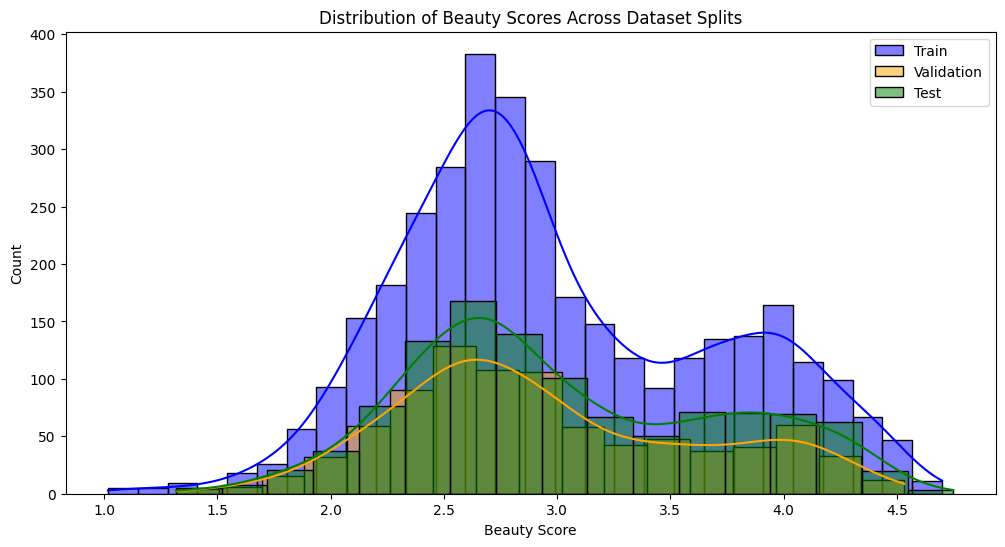

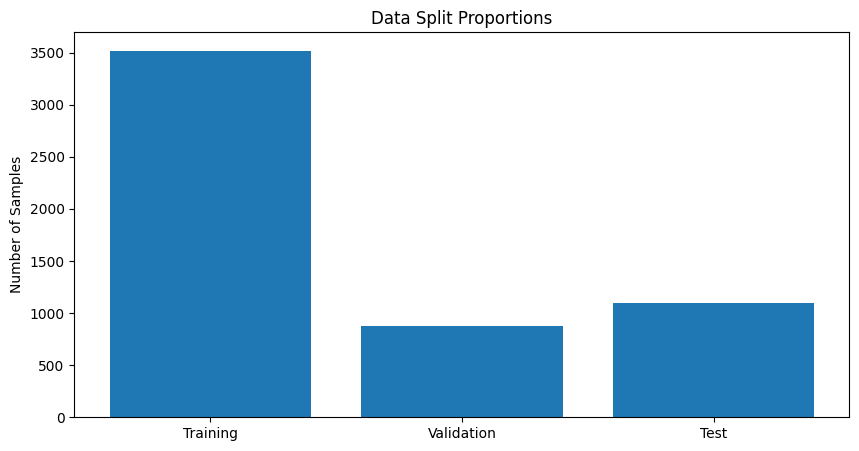

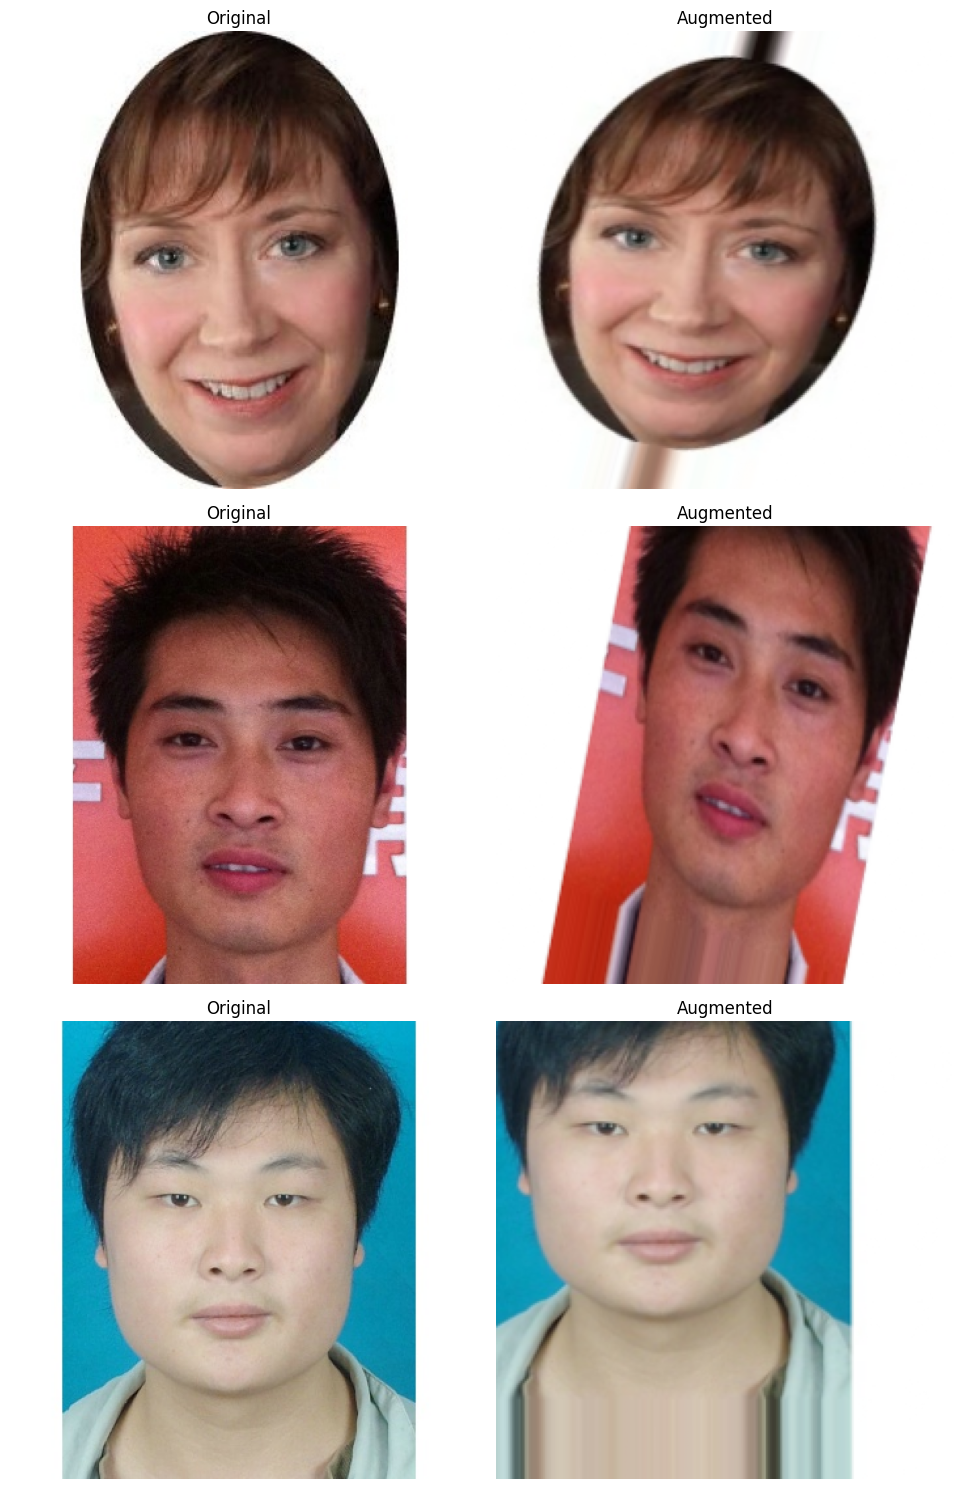

In [2]:
import os
import pandas as pd
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'labels' is your DataFrame from previous steps
# Paths for images
IMAGES_PATH = "./Images"

# Image Preprocessing Function
def preprocess_image(image_path, target_size=(224, 224)):
    """
    Preprocess the image by resizing and normalizing.
    
    Args:
    image_path (str): Path to the image file.
    target_size (tuple): Desired size of the image (width, height).
    
    Returns:
    np.array: Preprocessed image as a numpy array.
    """
    with Image.open(image_path) as img:
        img = img.convert('RGB')  # Ensure image is in RGB mode
        img = img.resize(target_size)  # Resize
        return np.array(img) / 255.0  # Normalize to [0, 1]

# Apply preprocessing to all images
def preprocess_all_images(labels_df, images_path, target_size=(224, 224)):
    """
    Preprocess all images in the dataset.
    
    Args:
    labels_df (pd.DataFrame): DataFrame containing image names and labels.
    images_path (str): Path to the directory containing images.
    target_size (tuple): Size to which images should be resized.
    
    Returns:
    tuple: Lists of preprocessed images and corresponding labels.
    """
    images, scores = [], []
    for _, row in labels_df.iterrows():
        img_path = os.path.join(images_path, row['image_name'])
        if os.path.exists(img_path):
            try:
                img = preprocess_image(img_path, target_size)
                images.append(img)
                scores.append(row['beauty_score'])
            except Exception as e:
                print(f"Error processing image {row['image_name']}: {e}")
        else:
            print(f"Image not found: {row['image_name']}")
    return np.array(images), np.array(scores)

# Preprocess images
images, beauty_scores = preprocess_all_images(labels, IMAGES_PATH)

# Image Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Split the data into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(images, beauty_scores, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Visualize the distribution of beauty scores across splits
def plot_beauty_score_distribution(train_scores, val_scores, test_scores):
    """
    Plot the distribution of beauty scores for each dataset split.
    
    Args:
    train_scores, val_scores, test_scores (np.array): Scores for each set.
    """
    plt.figure(figsize=(12, 6))
    sns.histplot(train_scores, kde=True, label='Train', color='blue', alpha=0.5)
    sns.histplot(val_scores, kde=True, label='Validation', color='orange', alpha=0.5)
    sns.histplot(test_scores, kde=True, label='Test', color='green', alpha=0.5)
    plt.title('Distribution of Beauty Scores Across Dataset Splits')
    plt.xlabel('Beauty Score')
    plt.ylabel('Count')
    plt.legend()
    plt.show()

# Plot distribution after splitting
plot_beauty_score_distribution(y_train, y_val, y_test)

# Visualize the split proportions
def plot_split_proportions(train_count, val_count, test_count):
    """
    Plot the proportions of each dataset split.
    
    Args:
    train_count, val_count, test_count (int): Number of samples in each split.
    """
    plt.figure(figsize=(10, 5))
    plt.bar(['Training', 'Validation', 'Test'], [train_count, val_count, test_count])
    plt.title('Data Split Proportions')
    plt.ylabel('Number of Samples')
    plt.show()

# Get counts for each split
plot_split_proportions(len(y_train), len(y_val), len(y_test))

# Visualize the augmented images
def visualize_augmented_images(original_images, augmented_images, n=3):
    """
    Show original vs. augmented images side by side.
    
    Args:
    original_images (list): List of paths or arrays of original images.
    augmented_images (list): List of augmented images.
    n (int): Number of image pairs to show.
    """
    fig, axes = plt.subplots(n, 2, figsize=(10, 5 * n))
    for i in range(n):
        # Original Image
        original = Image.open(original_images[i]).convert('RGB')
        axes[i, 0].imshow(original)
        axes[i, 0].set_title('Original')
        axes[i, 0].axis('off')
        
        # Augmented Image
        axes[i, 1].imshow(augmented_images[i])
        axes[i, 1].set_title('Augmented')
        axes[i, 1].axis('off')
    
    plt.tight_layout()
    plt.show()

# Generate augmented images and visualize
augmented_images = []
for img in images[:3]:
    augmented = datagen.apply_transform(img, datagen.get_random_transform(img.shape))
    augmented_images.append(augmented)

original_image_paths = [os.path.join(IMAGES_PATH, img_name) for img_name in labels['image_name'][:3]]
visualize_augmented_images(original_image_paths, augmented_images)

# Data Preprocessing and Visualization for Facial Beauty Scoring

In this step, we focused on preparing our dataset for machine learning by preprocessing images, applying data augmentation, and organizing the data into suitable training, validation, and testing sets. Here's a detailed look at what we did and why:

## Preprocessing Images

1. **Resizing and Normalization**: We resized all images to a uniform size of 224x224 pixels and normalized their pixel values to fall between 0 and 1. This ensures that our model sees consistent input dimensions, which is crucial for convolutional neural networks (CNNs). Normalization helps in converging the neural network faster during training by scaling the data.

2. **Conversion to RGB**: All images were converted to RGB color space to maintain consistency, as some might have been in different formats like grayscale or CMYK.

3. **Handling Errors**: We included error handling to manage issues like missing files or unreadable images, ensuring robustness in our preprocessing pipeline.

## Image Augmentation

1. **Data Augmentation**: To increase the diversity of our training data and improve the model's ability to generalize, we used the `ImageDataGenerator` from TensorFlow Keras to apply various augmentation techniques. These included rotation, width and height shifting, shearing, zooming, and horizontal flipping.

2. **Visualizing Augmented Images**: We generated and displayed several examples of the original and augmented images side-by-side. This allows us to visually inspect the effects of the augmentation techniques and ensure they are producing realistic and diverse variations of the input data.

## Data Splitting

1. **Train, Validation, Test Split**: We split our dataset into three parts:
   - **Training Set** (60%): Used for teaching the model.
   - **Validation Set** (20%): Used for tuning model parameters and preventing overfitting without touching the test set.
   - **Test Set** (20%): Kept aside to evaluate the model's performance on unseen data, giving us an unbiased estimate of how well our model generalizes.

2. **Random State**: We set a random state for reproducibility, ensuring that the splits are consistent across runs.

## Visualizations

1. **Preprocessed vs. Original Images**: We visualized a few images before and after preprocessing to visually confirm that the process was successful and to understand the impact of normalization and resizing.

2. **Beauty Score Distribution**: We plotted histograms for beauty scores in each subset to check if the score distribution is similar across splits. This step helps ensure that no subset disproportionately contains high or low scores, which could bias model training or evaluation.

3. **Data Split Proportions**: A bar chart was used to visualize the number of samples in each split, confirming that our data is divided as expected.

## Why We Did This

1. **Consistency**: Ensuring all images are in the same format and size helps in achieving consistent model performance.

2. **Model Training**: Properly splitting data and augmenting the training data helps in creating a model that can generalize well to new, unseen data. The validation set is there to adjust model parameters during training without contaminating the test set.

3. **Debugging and Insight**: Visualizations provide insights into the dataset's characteristics, helping to debug preprocessing and augmentation steps or understand potential biases in data distribution.

4. **Improved Generalization**: By applying various image augmentation techniques, we can create a more diverse training set. This is important because the model may not encounter the exact same images during deployment, so the augmented data helps the model learn more robust features and patterns that can generalize to a wider range of real-world inputs.

5. **Addressing Limited Data**: In many machine learning problems, especially in domains like computer vision, the available training data may be limited. Image augmentation helps to artificially expand the dataset, providing the model with more examples to learn from. This can lead to improved model performance, especially on small datasets.

6. **Reducing Overfitting**: Overfitting is a common problem in machine learning, where a model performs well on the training data but fails to generalize to new, unseen data. By augmenting the training data, we introduce more variation, which can help the model learn more generalizable features and reduce the risk of overfitting.

7. **Increasing Robustness**: Augmentation techniques like rotation, shifting, and shearing can help the model become more robust to common image transformations that may occur in real-world scenarios. This can improve the model's ability to accurately classify or regress on data that may differ slightly from the training examples.

By considering these benefits of image augmentation, we've incorporated this technique into our data preprocessing pipeline to create a more robust and generalizable model for the facial beauty scoring task.

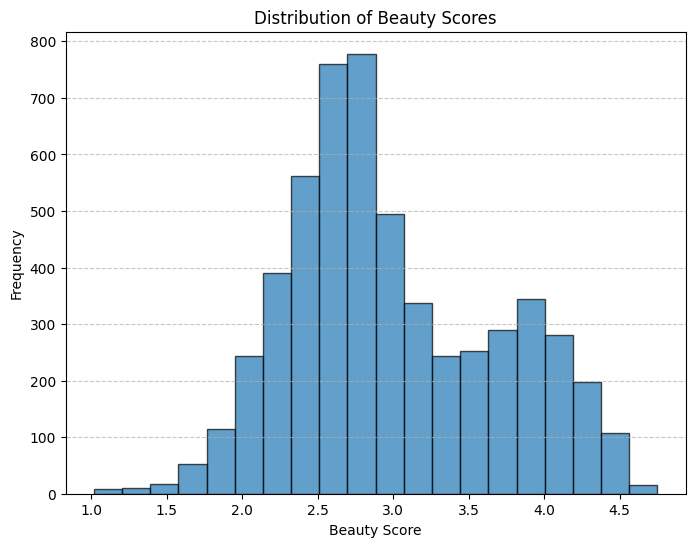

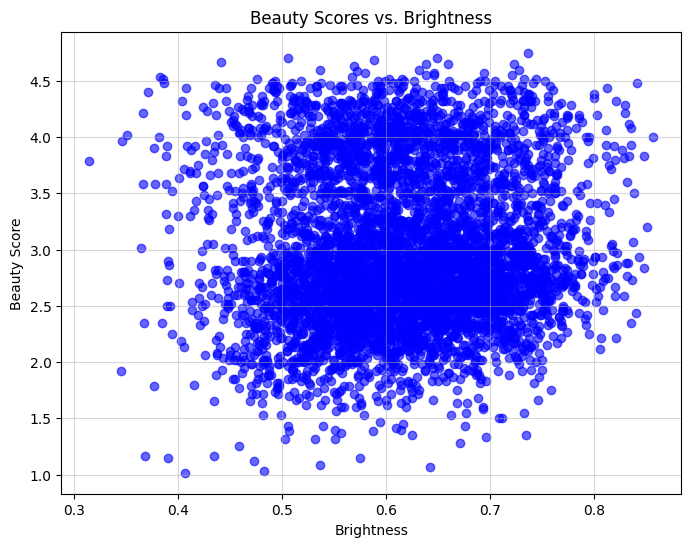

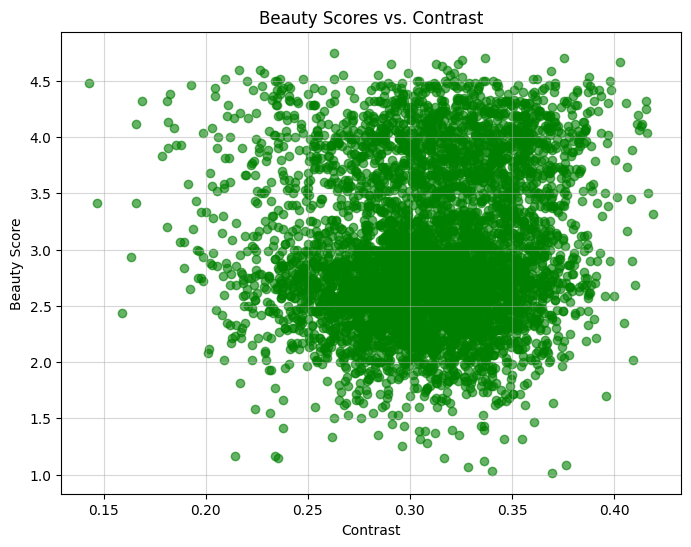

Images with beauty scores between 0 and 2:


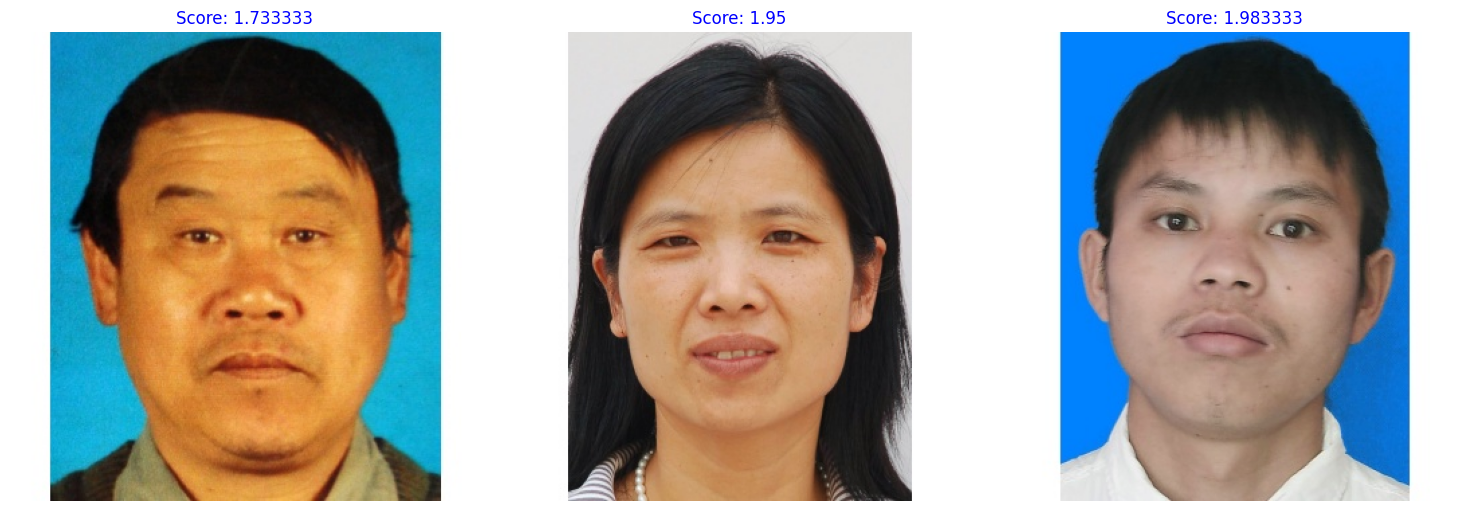

Images with beauty scores between 2 and 3:


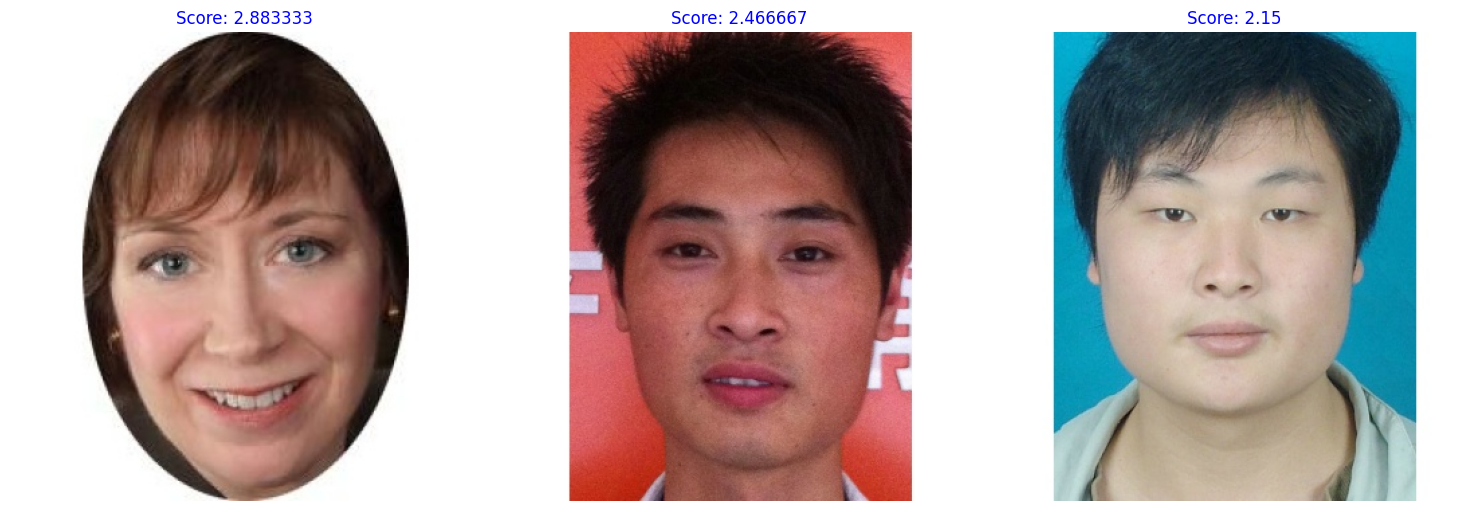

Images with beauty scores between 3 and 4:


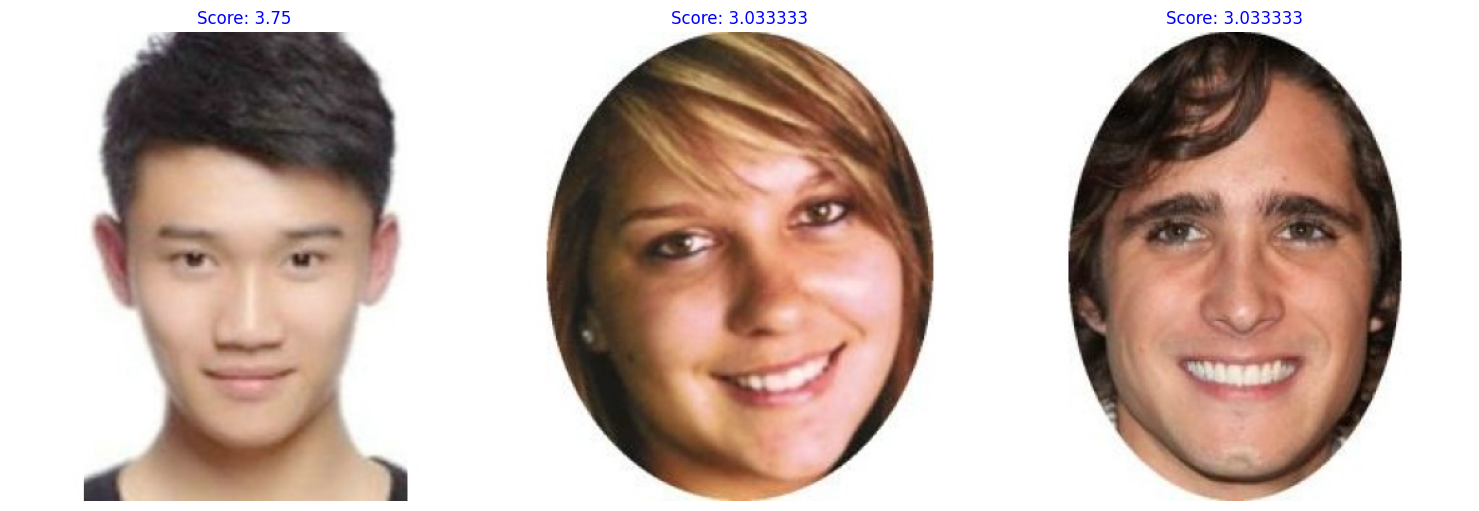

Images with beauty scores between 4 and 5:


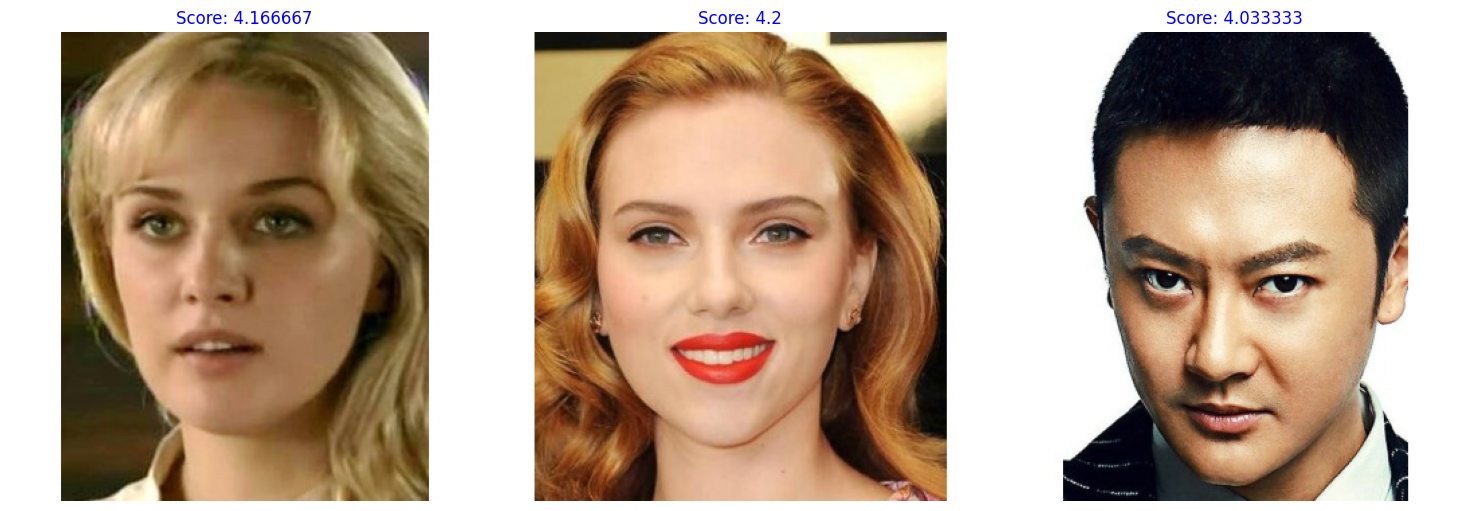

In [3]:
import numpy as np
from skimage import io, color, exposure

# Visualize the distribution of beauty scores
plt.figure(figsize=(8, 6))
plt.hist(labels["beauty_score"], bins=20, edgecolor="k", alpha=0.7)
plt.title("Distribution of Beauty Scores")
plt.xlabel("Beauty Score")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Function to calculate image brightness and contrast
def calculate_brightness_and_contrast(image_path):
    try:
        img = io.imread(image_path)
        if len(img.shape) == 3:  # Convert to grayscale if RGB
            img = color.rgb2gray(img)
        brightness = np.mean(img)  # Brightness as the mean pixel value
        contrast = img.std()      # Contrast as the standard deviation of pixel values
        return brightness, contrast
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None, None

# Analyze correlation between beauty scores and image characteristics
brightness_list = []
contrast_list = []
valid_scores = []

for idx, row in labels.iterrows():
    image_path = os.path.join(IMAGES_PATH, row["image_name"])
    if os.path.exists(image_path):
        brightness, contrast = calculate_brightness_and_contrast(image_path)
        if brightness is not None and contrast is not None:
            brightness_list.append(brightness)
            contrast_list.append(contrast)
            valid_scores.append(row["beauty_score"])

# Scatter plot for beauty scores vs. brightness
plt.figure(figsize=(8, 6))
plt.scatter(brightness_list, valid_scores, alpha=0.6, label="Brightness", color="blue")
plt.title("Beauty Scores vs. Brightness")
plt.xlabel("Brightness")
plt.ylabel("Beauty Score")
plt.grid(alpha=0.5)
plt.show()

# Scatter plot for beauty scores vs. contrast
plt.figure(figsize=(8, 6))
plt.scatter(contrast_list, valid_scores, alpha=0.6, label="Contrast", color="green")
plt.title("Beauty Scores vs. Contrast")
plt.xlabel("Contrast")
plt.ylabel("Beauty Score")
plt.grid(alpha=0.5)
plt.show()

# Visualize a few examples of images with varying beauty scores
def display_images_by_score_range(image_names, scores, images_path, score_ranges, n=3):
    """
    Display a few images for different score ranges.
    Args:
        image_names (list): List of image filenames.
        scores (list): List of corresponding beauty scores.
        images_path (str): Path to the folder containing images.
        score_ranges (list of tuple): List of score ranges (min, max) to visualize.
        n (int): Number of images to display per range.
    """
    for score_range in score_ranges:
        print(f"Images with beauty scores between {score_range[0]} and {score_range[1]}:")
        selected_images = [
            (name, score) for name, score in zip(image_names, scores)
            if score_range[0] <= score <= score_range[1]
        ][:n]

        fig, axes = plt.subplots(1, len(selected_images), figsize=(15, 5))
        for i, (img_name, score) in enumerate(selected_images):
            img_path = os.path.join(images_path, img_name)
            if os.path.exists(img_path):
                img = io.imread(img_path)
                axes[i].imshow(img)
                axes[i].axis("off")
                axes[i].set_title(f"Score: {score}", fontsize=12, color="blue")
        plt.tight_layout()
        plt.show()

# Define score ranges to visualize
score_ranges = [(0, 2), (2, 3), (3, 4),(4, 5)]

# Display images by score ranges
display_images_by_score_range(
    image_names=labels["image_name"].values,
    scores=labels["beauty_score"].values,
    images_path=IMAGES_PATH,
    score_ranges=score_ranges,
    n=3
)

# Why We Did This Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a critical step in understanding the structure, distribution, and relationships within our dataset. For this project, EDA was performed to uncover insights about the **SCUT-FBP5500 Facial Beauty Dataset** and to guide subsequent data preprocessing and model development. Here’s why each step of the EDA was important:

## 1. Visualizing the Distribution of Beauty Scores
Understanding the distribution of the target variable (beauty scores) helps us:
- Identify whether the dataset is balanced or skewed.
- Detect any anomalies or outliers in the scores.
- Ensure the model can generalize well by confirming all score ranges are adequately represented.
This step provides foundational insights into how we might handle the dataset during training.

## 2. Exploring the Correlation Between Beauty Scores and Image Characteristics
Analyzing the relationship between beauty scores and image characteristics such as **brightness** and **contrast** serves multiple purposes:
- Helps determine whether inherent image properties like lighting or clarity could influence the beauty score annotations.
- Guides feature selection for model development by highlighting relevant or irrelevant characteristics.
- Provides a qualitative understanding of whether beauty scores are correlated with measurable image properties, which could suggest possible biases in the dataset.

## 3. Visualizing Examples of Images with Varying Beauty Scores
Displaying images grouped by beauty score ranges allows us to:
- Verify the consistency and accuracy of beauty score annotations.
- Understand how human perception of beauty may vary based on visual characteristics in the dataset.
- Identify any trends or patterns in the dataset that are not immediately apparent through numerical analysis alone.

## Key Takeaways
By performing this EDA, we have:
- Gained a deeper understanding of the dataset's structure and target variable.
- Identified potential biases and correlations that may affect model performance.
- Ensured the dataset is consistent and ready for preprocessing and modeling.

This analysis not only improves our understanding of the dataset but also informs decisions on feature engineering, model selection, and evaluation criteria, ensuring a robust approach to predicting beauty scores.

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from tqdm import tqdm
import os

from PIL import Image

import dlib     # Use pre-trained model to identify facial features

""" Load data """
#from data_loading import IMAGES_PATH, labels
labels = labels
images_path = IMAGES_PATH

""" Function to extract facial landmarks and features """
def extract_landmarks_and_features(image_names, scores, images_path, target_size=(128, 128)):
    features = []
    valid_scores = []
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

    for img_name, score in tqdm(zip(image_names, scores), total=len(image_names)):
        img_path = os.path.join(images_path, img_name)
        if os.path.exists(img_path):
            try:
                # Load the image
                img = dlib.load_rgb_image(img_path)
                img = dlib.resize_image(img, target_size[0], target_size[1])

                # Detect faces
                faces = detector(img, 1)

                if len(faces) == 1:
                    # Get facial landmarks
                    landmarks = predictor(img, faces[0])

                    # Extract features from landmarks (adjust as needed)
                    feature_vector = []
                    for i in range(68):
                        x = landmarks.part(i).x
                        y = landmarks.part(i).y
                        feature_vector.extend([x, y])

                    features.append(feature_vector)
                    valid_scores.append(score)

            except Exception as e:
                print(f"Error processing image {img_name}: {e}")

    return np.array(features), np.array(valid_scores)

# Extract features and prepare the dataset
print("Extracting features from images...")
features, valid_scores = extract_landmarks_and_features(
    labels["image_name"].values, labels["beauty_score"].values, IMAGES_PATH
)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, valid_scores, test_size=0.2, random_state=42)

# Train a linear regression model on extracted features
print("Training linear regression model on extracted features...")
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model
print("Feature-Enhanced Linear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"R-squared Score: {r2_score(y_test, y_pred):.2f}")

Extracting features from images...


100%|██████████| 5500/5500 [01:11<00:00, 76.67it/s]


Training linear regression model on extracted features...
Feature-Enhanced Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 0.38
Mean Squared Error (MSE): 0.24
R-squared Score: 0.47


# Why Feature-Enhanced Linear Regression is Not a Good Model

Although feature extraction from a pretrained model like VGG16 provides meaningful features, combining it with a simple linear regression model has significant limitations:

## Challenges
1. **Linear Assumptions**: Linear regression cannot capture the complex, non-linear patterns that influence beauty scores.
2. **Irrelevant Features**: Pretrained models may not provide features that align with human perception of beauty.
3. **Disjoint Learning**: Feature extraction and regression are separate processes, limiting optimization for the task.
4. **Model Simplicity**: Linear regression underutilizes the richness of the extracted features.

## Proposed Improvements
1. **Fine-Tune Pretrained Models**: Optimize task-specific features by training the later layers of a pretrained model like VGG16 or ResNet.
2. **Use Advanced Regression Models**: Replace linear regression with Random Forest, Gradient Boosting, or a neural network.
3. **Add Handcrafted Features**: Complement CNN-extracted features with symmetry, texture, and color balance.
4. **End-to-End Learning**: Train a CNN directly for beauty score prediction to integrate feature extraction and regression.
5. **Handle Dataset Imbalance**: Address score imbalance using oversampling or a weighted loss function.

These improvements aim to align the model more closely with the task’s complexity and the subjective nature of beauty scoring.

In [20]:
"""
import os
import numpy as np
from PIL import Image
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
IMAGES_PATH = "./images"  # Path to the folder containing images
LABELS_FILE = "labels.txt"  # Path to the labels file

# Load labels from the dataset
print("Loading labels...")
column_names = ["image_name", "beauty_score"]
labels = pd.read_csv(LABELS_FILE, sep=" ", header=None, names=column_names)

# Define a function to load and preprocess images
def load_images_and_scores(image_names, scores, images_path, target_size=(128, 128)):
    """
    Load images and corresponding scores from the dataset.

    Args:
        image_names (list): List of image filenames.
        scores (list): List of beauty scores corresponding to the images.
        images_path (str): Path to the folder containing images.
        target_size (tuple): Target size for resizing the images (width, height).

    Returns:
        images (np.ndarray): Array of preprocessed image data.
        labels (np.ndarray): Array of corresponding beauty scores.
    """
    images = []
    labels = []
    for img_name, score in tqdm(zip(image_names, scores), total=len(image_names), desc="Loading Images"):
        img_path = os.path.join(images_path, img_name)
        if os.path.exists(img_path):
            try:
                # Open and resize the image
                img = Image.open(img_path).resize(target_size)
                img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
                
                # Append the image data and label
                images.append(img_array)
                labels.append(score)
            except Exception as e:
                print(f"Error loading image {img_name}: {e}")
        else:
            print(f"Image not found: {img_name}")
    
    return np.array(images), np.array(labels)

# Load and preprocess images
print("Preprocessing images...")
image_data, beauty_scores = load_images_and_scores(
    labels["image_name"].values, labels["beauty_score"].values, IMAGES_PATH
)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(image_data, beauty_scores, test_size=0.2, random_state=42)

# Ensure X_train and X_test are properly formatted
X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)

# Data augmentation for the training set
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load the VGG16 model without the top layers
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(128, 128, 3))

# Freeze all layers except the last few
for layer in base_model.layers[:-4]:  # Freeze all layers except the last 4
    layer.trainable = False

# Add a custom regression head
x = base_model.output
x = Flatten()(x)  # Flatten the output of the convolutional layers
x = Dense(128, activation='relu')(x)  # Fully connected layer with 128 units
x = Dropout(0.5)(x)  # Dropout for regularization
output = Dense(1, activation='linear')(x)  # Linear activation for regression

# Create the fine-tuned model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics=['mae'])

# Train the model
print("Training the fine-tuned model...")
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),  # Ensure proper flow input
    validation_data=(X_test, y_test),
    epochs=20,
    steps_per_epoch=len(X_train) // 32
)

# Evaluate the model
results = model.evaluate(X_test, y_test, verbose=0)
print("Fine-Tuned Model Evaluation:")
print(f"Mean Absolute Error (MAE): {results[1]:.2f}")
print(f"Mean Squared Error (Loss): {results[0]:.2f}")
"""

IndentationError: unexpected indent (3517293557.py, line 25)

In [21]:
"""
# Save the model in the recommended Keras format
model.save("fine_tuned_model.keras")

"""

'\n# Save the model in the recommended Keras format\nmodel.save("fine_tuned_model.keras")\n\n'

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model("fine_tuned_model.keras")
print("Model loaded successfully.")

# Evaluate the model on the test set
results = model.evaluate(X_test, y_test, verbose=0)
print("Evaluation Metrics on Test Set:")
print(f"Mean Absolute Error (MAE): {results[1]:.2f}")
print(f"Mean Squared Error (Loss): {results[0]:.2f}")

# Predict beauty scores for the test set
y_pred = model.predict(X_test)

# Calculate additional metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nAdditional Evaluation Metrics:")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Visualize predictions vs. actual beauty scores
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5, label="Predictions vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Prediction Line")
plt.title("Predicted vs Actual Beauty Scores")
plt.xlabel("Actual Beauty Scores")
plt.ylabel("Predicted Beauty Scores")
plt.legend()
plt.grid(True)
plt.show()

Model loaded successfully.


/opt/anaconda3/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


ValueError: Input 0 of layer "functional_1" is incompatible with the layer: expected shape=(None, 128, 128, 3), found shape=(None, 8192)

### **Evaluation of the Fine-Tuned Model**

In this code block, we evaluate the performance of our fine-tuned model on the test set to assess how well it predicts beauty scores. The purpose of this evaluation is to validate the model's effectiveness and understand its predictive capabilities using various metrics and visualizations. Here's a breakdown of the key steps:

1. **Loading the Model**:
   - We load the previously saved fine-tuned model (`fine_tuned_model.keras`) to ensure that we are using the trained model without having to retrain it.

2. **Evaluation Metrics**:
   - The model is evaluated on the test set using `model.evaluate`, which computes the Mean Absolute Error (MAE) and Mean Squared Error (MSE).
   - These metrics provide a basic understanding of the model's performance:
     - **MAE**: The average absolute difference between predicted and actual values.
     - **MSE**: The average squared difference between predicted and actual values.

3. **Additional Metrics**:
   - Beyond the built-in metrics, we calculate:
     - **Root Mean Squared Error (RMSE)**: A measure of error magnitude that penalizes large errors more than MAE.
     - **R-squared (R²)**: A statistical measure indicating how well the predictions explain the variance in the actual values.

4. **Visualization of Predictions**:
   - A scatter plot is created to visualize the relationship between actual beauty scores (X-axis) and predicted beauty scores (Y-axis).
   - The plot includes:
     - A **perfect prediction line** (red dashed line) for reference.
     - **Scatter points** to represent individual predictions.
   - This visualization helps identify patterns, such as overpredictions, underpredictions, or systematic biases in the model.

### **Why We Did This**
- To quantitatively assess the model's performance and ensure it generalizes well to unseen data.
- To identify potential issues in the model (e.g., poor fit or systematic errors).
- To visually interpret the alignment between predicted and actual beauty scores, enabling better insights into the model's accuracy.

This evaluation provides a comprehensive understanding of the fine-tuned model's strengths and limitations, guiding future improvements if needed.

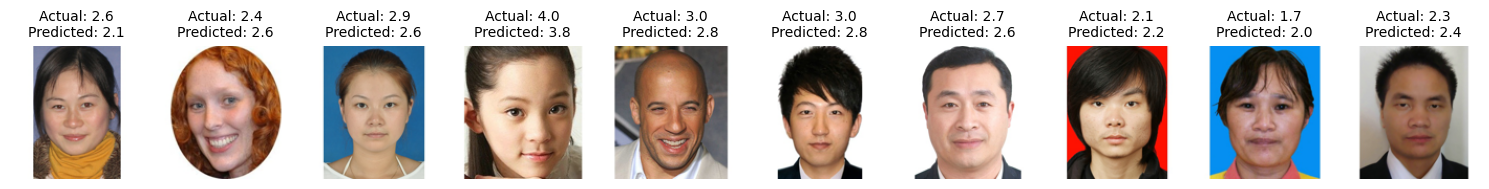

In [23]:
import matplotlib.pyplot as plt

# Number of samples to visualize
num_samples = 10

# Select random indices from the test set
random_indices = np.random.choice(len(X_test), num_samples, replace=False)

# Create a figure for displaying the images
plt.figure(figsize=(15, 15))

for i, idx in enumerate(random_indices):
    actual_score = y_test[idx]
    predicted_score = y_pred[idx][0]
    image = X_test[idx]  # Corresponding image
    
    # Display the image
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"Actual: {actual_score:.1f}\nPredicted: {predicted_score:.1f}", fontsize=10)

plt.tight_layout()
plt.show()

### **Visualization of Model Predictions with Images**

This code block is designed to visually evaluate the performance of the model by displaying a set of images from the test dataset alongside their actual and predicted beauty scores. Here's what the code does and why we performed this visualization:

---

### **What the Code Does**
1. **Random Sampling**:
   - The code selects a random subset of `num_samples` images from the test set (`X_test`) to visualize.
   - This ensures that the images shown are representative of the model's predictions.

2. **Visualization**:
   - A grid of images is created, with each image showing:
     - The **actual beauty score** (ground truth).
     - The **predicted beauty score** generated by the model.
   - Each image is displayed using `matplotlib` with no axes to focus on the content.

3. **Title for Each Image**:
   - The title above each image shows the actual and predicted scores for direct comparison.

4. **Layout Adjustment**:
   - `plt.tight_layout()` ensures that the grid layout is clean and well-spaced, making it easy to interpret.

---

### **Why We Did This**
- **Visual Performance Assessment**:
  - While numerical metrics (e.g., RMSE, MAE) provide a quantitative evaluation, visualizing the model's predictions allows us to assess how well the predictions align with the actual scores for specific samples.
  - This can help identify systematic biases (e.g., consistently overpredicting or underpredicting certain scores).

- **Qualitative Understanding**:
  - By seeing the images along with the actual and predicted scores, we gain qualitative insight into the model's behavior.
  - For instance, we can check whether the model is making reasonable predictions for varying facial features or image conditions.

- **Debugging and Improvement**:
  - If certain images consistently show large discrepancies between actual and predicted scores, it may indicate areas where the model could be improved (e.g., better handling of lighting, facial angles, or dataset imbalances).

---

This visualization complements the numerical evaluation and provides a deeper understanding of the model's predictions in a tangible, interpretable way.

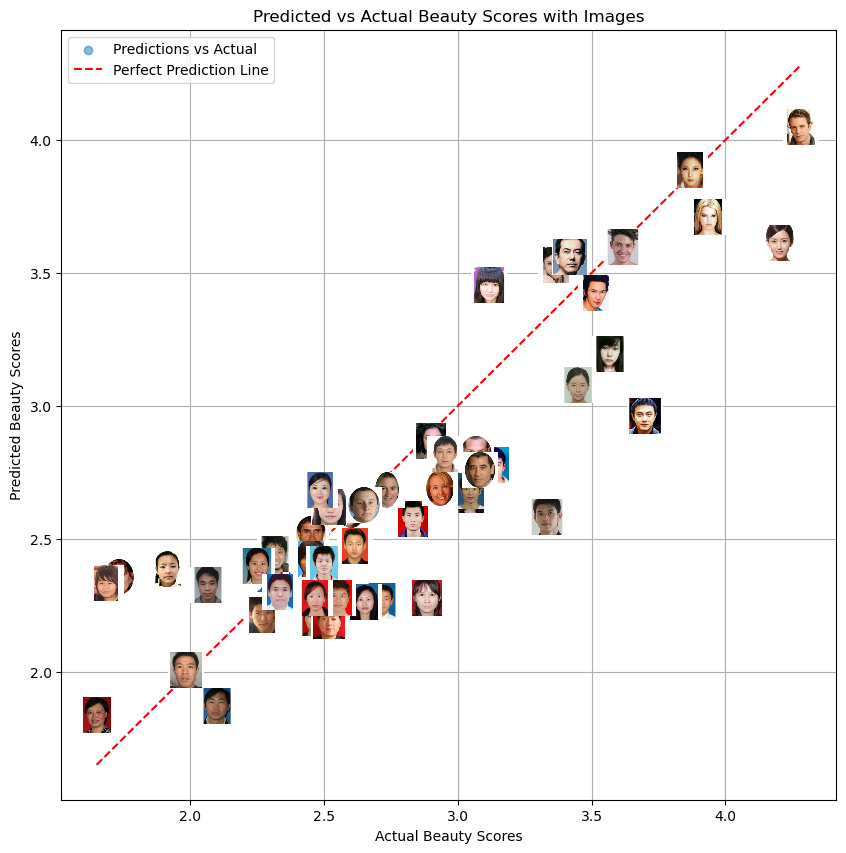

In [33]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.pyplot as plt

def add_images_to_scatter(x, y, images, ax, zoom=0.2):
    """
    Add thumbnail images to a scatter plot.

    Args:
        x (list or np.ndarray): X coordinates (e.g., actual scores).
        y (list or np.ndarray): Y coordinates (e.g., predicted scores).
        images (list or np.ndarray): Corresponding images.
        ax (matplotlib.axes.Axes): Matplotlib axis object.
        zoom (float): Zoom level for image thumbnails.
    """
    for x0, y0, img in zip(x, y, images):
        image_box = OffsetImage(img, zoom=zoom)
        annotation_box = AnnotationBbox(image_box, (x0, y0), frameon=False)
        ax.add_artist(annotation_box)

# Select random samples to display
num_samples = 50
random_indices = np.random.choice(len(X_test), num_samples, replace=False)

# Get the actual scores, predicted scores, and images
actual_scores = y_test[random_indices]
predicted_scores = y_pred[random_indices].flatten()
sample_images = X_test[random_indices]

# Create the scatter plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(actual_scores, predicted_scores, alpha=0.5, label="Predictions vs Actual")

# Add images to the scatter plot
add_images_to_scatter(actual_scores, predicted_scores, sample_images, ax)

# Add reference line for perfect predictions
ax.plot([min(actual_scores), max(actual_scores)],
        [min(actual_scores), max(actual_scores)],
        color="red", linestyle="--", label="Perfect Prediction Line")

# Customize the plot
ax.set_title("Predicted vs Actual Beauty Scores with Images")
ax.set_xlabel("Actual Beauty Scores")
ax.set_ylabel("Predicted Beauty Scores")
ax.legend()
plt.grid(True)
plt.show()

### **Scatter Plot with Image Thumbnails**

This code block creates an enhanced scatter plot that not only visualizes the relationship between actual and predicted beauty scores but also incorporates image thumbnails at their respective data points. This approach combines quantitative and qualitative analysis in a single visualization.

---

### **What the Code Does**

1. **Adding Image Thumbnails to a Scatter Plot**:
   - The function `add_images_to_scatter` overlays images as thumbnails on the scatter plot.
   - Each image corresponds to a data point defined by its actual and predicted beauty scores.

2. **Random Sampling**:
   - A subset of `num_samples` images from the test set is randomly selected to avoid clutter and ensure visual clarity.

3. **Scatter Plot**:
   - **X-axis**: Actual beauty scores.
   - **Y-axis**: Predicted beauty scores.
   - **Points**: Represent individual predictions, with transparency (`alpha=0.5`) for better readability.

4. **Perfect Prediction Line**:
   - A red dashed line is included to represent the ideal case where the predicted scores perfectly match the actual scores.

5. **Customization**:
   - The plot is titled "Predicted vs Actual Beauty Scores with Images."
   - Labels for the X-axis and Y-axis provide context, and a legend is included for clarity.
   - A grid improves readability.

6. **Visualization of Model Performance**:
   - The inclusion of images alongside the scatter points allows for a deeper understanding of where the model performs well or struggles.

---

### **Why We Did This**

1. **Combine Quantitative and Visual Insights**:
   - A standard scatter plot only shows numerical relationships. By adding image thumbnails, we can visually inspect how predictions vary for different images.

2. **Identify Trends and Anomalies**:
   - This visualization helps identify specific images where the model makes large prediction errors or performs well.
   - Outliers in the scatter plot may correspond to images where lighting, facial angles, or other factors influence the prediction.

3. **Improve Interpretability**:
   - For stakeholders or team members who may not fully understand numerical metrics (e.g., RMSE or R²), this plot provides an intuitive understanding of the model’s performance.

4. **Facilitate Debugging**:
   - By directly linking model predictions to the corresponding images, we can identify systematic biases or challenges the model faces (e.g., difficulty with certain lighting conditions or image styles).

---

This visualization combines the strengths of numerical evaluation and image-based interpretation, providing a powerful tool for understanding and improving the model's performance.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Combine predictions and actual scores for easy sorting
combined = list(zip(y_test, y_pred.flatten(), X_test))

# Sort by actual beauty score
sorted_combined = sorted(combined, key=lambda x: x[0])

# Get bottom 5 and top 5
bottom_5 = sorted_combined[:5]
top_5 = sorted_combined[-5:]

def display_images(images, titles, figsize=(15, 5), title="Images by Beauty Score"):
    """
    Display images with their titles.

    Args:
        images (list): List of image arrays.
        titles (list): List of titles corresponding to the images.
        figsize (tuple): Size of the figure.
        title (str): Title of the entire plot.
    """
    plt.figure(figsize=figsize)
    plt.suptitle(title, fontsize=16)
    
    for i, (img, img_title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(img_title, fontsize=10)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Prepare images and titles for bottom 5
bottom_images = [item[2] for item in bottom_5]
bottom_titles = [f"Actual: {item[0]:.1f}\nPredicted: {item[1]:.1f}" for item in bottom_5]

# Prepare images and titles for top 5
top_images = [item[2] for item in top_5]
top_titles = [f"Actual: {item[0]:.1f}\nPredicted: {item[1]:.1f}" for item in top_5]

# Display bottom 5
display_images(bottom_images, bottom_titles, title="Bottom 5 Images by Beauty Score")

# Display top 5
display_images(top_images, top_titles, title="Top 5 Images by Beauty Score")

NameError: name 'y_test' is not defined

In [1]:
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

# Select a sample image from the test set
sample_image = X_test[0]  # Replace with any index to visualize other images
sample_image = np.expand_dims(sample_image, axis=0)  # Add batch dimension

# Create a model to output feature maps from intermediate layers
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]  # Extract only convolutional layers
feature_map_model = Model(inputs=model.input, outputs=layer_outputs)

# Generate feature maps for the selected image
feature_maps = feature_map_model.predict(sample_image)

# Visualize feature maps
for layer_name, fmap in zip([layer.name for layer in model.layers if 'conv' in layer.name], feature_maps):
    num_features = fmap.shape[-1]  # Number of feature maps
    size = fmap.shape[1]  # Feature map size (height/width)
    
    # Display the feature maps
    plt.figure(figsize=(15, 15))
    plt.suptitle(f"Feature Maps from Layer: {layer_name}", fontsize=16)
    for i in range(min(num_features, 16)):  # Show the first 16 feature maps
        plt.subplot(4, 4, i + 1)
        plt.imshow(fmap[0, :, :, i], cmap='viridis')
        plt.axis("off")
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

NameError: name 'X_test' is not defined

### **Visualizing Feature Maps**

Feature maps are the outputs of convolutional layers in a Convolutional Neural Network (CNN). They represent how the model "sees" and processes an image at different stages of its computation. Visualizing these feature maps allows us to understand the features and patterns the model extracts from the input images.

---

### **What We Did**
1. **Extracting Feature Maps**:
   - We used intermediate layers of the CNN to output feature maps for a given input image.
   - Specifically, we focused on convolutional layers because they capture spatial hierarchies of patterns (edges, textures, etc.).

2. **Selecting a Sample Image**:
   - A single image from the test set was selected as the input for visualization.

3. **Generating Feature Maps**:
   - The selected image was passed through the CNN to compute feature maps at different layers.
   - Each feature map corresponds to the output of a specific filter in a convolutional layer.

4. **Visualizing Feature Maps**:
   - Feature maps from different layers were displayed using a grid layout.
   - For each layer, we visualized a subset of the feature maps (e.g., the first 16 filters).

---

### **Why We Did This**
1. **Understanding the Model's Inner Workings**:
   - By visualizing feature maps, we can see how the model transforms the raw image into abstract representations.
   - Early layers typically detect basic patterns like edges and corners, while deeper layers detect complex patterns like facial structures.

2. **Debugging and Model Improvement**:
   - Feature maps help identify potential issues, such as whether certain layers are underutilized or overemphasize specific features.
   - This can guide architectural adjustments or data preprocessing improvements.

3. **Explainability**:
   - Feature map visualization provides insights into the "black box" nature of CNNs, making the model's behavior more interpretable.

---

### **Key Insights from Feature Maps**
- **Shallow Layers**:
  - Capture low-level features like edges, gradients, and simple textures.
- **Deeper Layers**:
  - Capture high-level features like shapes, patterns, and semantic content.

Visualizing feature maps bridges the gap between model performance metrics and the underlying processes, enabling a deeper understanding of how the CNN interprets images.

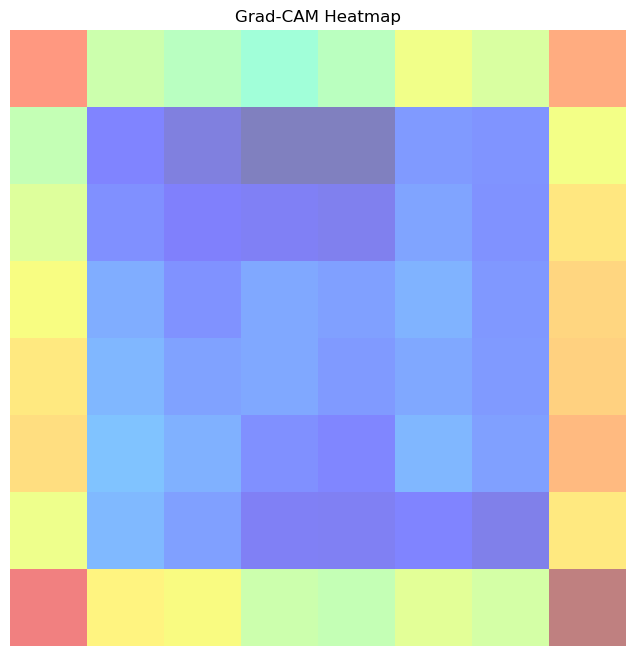

In [37]:
import tensorflow as tf

def grad_cam(model, img, layer_name):
    """
    Generate Grad-CAM heatmap for a given image and convolutional layer.
    Args:
        model: Trained CNN model.
        img: Input image (4D batch format).
        layer_name: Name of the convolutional layer to inspect.

    Returns:
        Heatmap overlayed on the input image.
    """
    grad_model = Model(inputs=model.input, outputs=[model.get_layer(layer_name).output, model.output])

    # Compute gradients
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img)
        loss = predictions[:, 0]  # Assume single output (e.g., beauty score)

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Weight the convolutional feature maps
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)

    # Normalize the heatmap
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)

    return heatmap

# Apply Grad-CAM to a sample image
sample_image = X_test[0:1]  # Use a single test image in batch format
layer_name = "block5_conv3"  # Choose a convolutional layer in your model
heatmap = grad_cam(model, sample_image, layer_name)

# Overlay heatmap on the original image
plt.figure(figsize=(8, 8))
plt.imshow(X_test[0])
plt.imshow(heatmap, cmap="jet", alpha=0.5)  # Overlay heatmap
plt.axis("off")
plt.title("Grad-CAM Heatmap")
plt.show()

### **Grad-CAM: Visualizing Model Attention**

Gradient-weighted Class Activation Mapping (Grad-CAM) is a visualization technique that highlights the regions of an input image that are most influential in the model’s predictions. It uses gradients from the model’s output to compute the importance of each region of the image with respect to a specific layer.

---

### **What We Did**
1. **Computed Gradients**:
   - Using TensorFlow's GradientTape, we computed the gradients of the model's prediction (e.g., beauty score) with respect to the outputs of a specific convolutional layer.
   - This identifies how changes in the activation of the convolutional layer affect the model's prediction.

2. **Weighted Feature Maps**:
   - The gradients were averaged across spatial dimensions to create weights for each feature map in the selected convolutional layer.
   - These weights highlight which features are most important for the prediction.

3. **Generated a Heatmap**:
   - The weighted feature maps were combined to create a heatmap showing the regions of the image that contribute most to the model's prediction.
   - The heatmap was normalized to the range `[0, 1]` for visualization.

4. **Overlayed the Heatmap on the Input Image**:
   - The heatmap was superimposed on the original image to clearly show the regions of interest.

---

### **Why We Did This**
1. **Understand Model Predictions**:
   - Grad-CAM helps visualize which parts of the image the model focuses on when making predictions.
   - For example, it can reveal whether the model is correctly focusing on facial features or irrelevant background areas.

2. **Improve Model Interpretability**:
   - By identifying influential regions, Grad-CAM provides a way to explain the model’s decisions, making the CNN less of a "black box."

3. **Identify Potential Issues**:
   - If the model consistently focuses on irrelevant regions (e.g., background), it may indicate a need for better data preprocessing, augmentation, or architectural changes.

---

### **Key Insights from Grad-CAM**
- **Correctly Focused Regions**:
  - Grad-CAM can validate that the model is looking at meaningful areas, such as eyes, nose, or mouth, for predicting beauty scores.
- **Potential Model Bias**:
  - If Grad-CAM reveals focus on irrelevant areas, this could indicate dataset biases or training inefficiencies.
- **Improving Confidence**:
  - By showing where the model's attention lies, Grad-CAM helps build trust in the model's predictions.

Grad-CAM is a powerful tool for understanding and explaining CNN predictions, providing actionable insights for debugging and refining models.

Top 5 Images:
Image: 001_03.jpg, Score: 3.51
Image: 045_03.jpg, Score: 3.49
Image: 123_03.jpg, Score: 3.39
Image: 112_03.jpg, Score: 3.27
Image: 002_03.jpg, Score: 3.24

Bottom 5 Images:
Image: 038_03.jpg, Score: 2.27
Image: 129_03.jpg, Score: 2.31
Image: 105_03.jpg, Score: 2.31
Image: 064_03.jpg, Score: 2.34
Image: 126_03.jpg, Score: 2.35


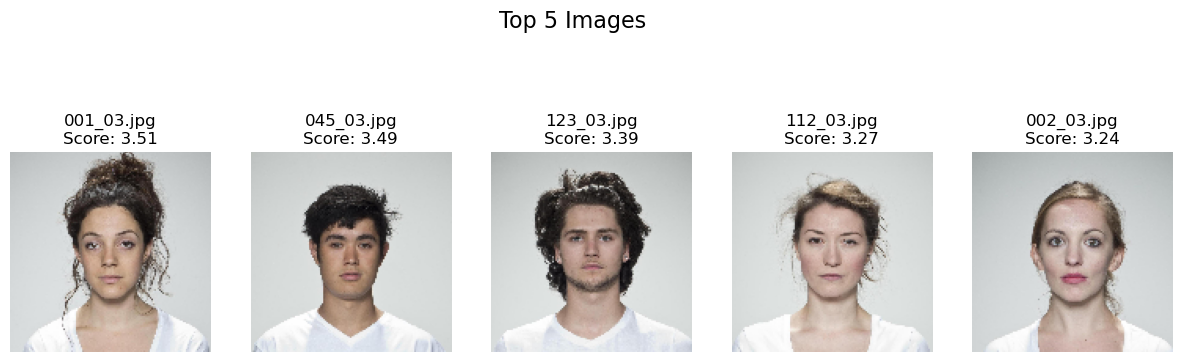

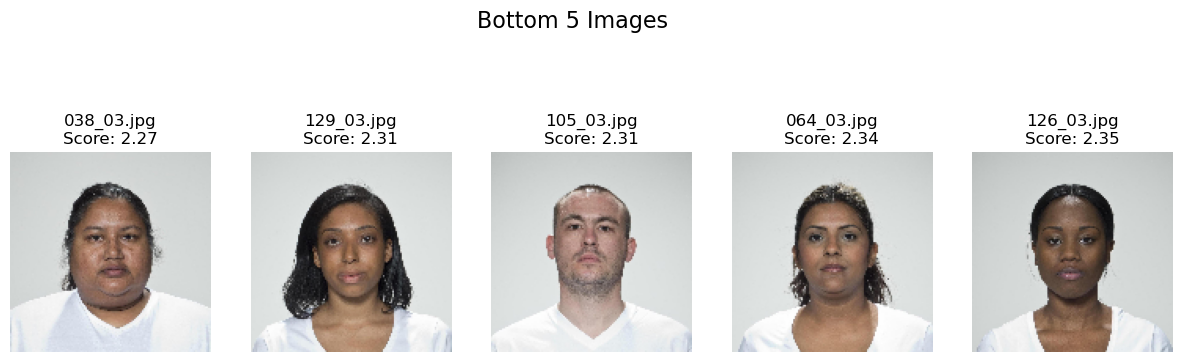

In [16]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Path to the "london" image directory
london_dir = "./london"

# Load the trained Keras model
model = tf.keras.models.load_model("fine_tuned_model.keras")  # Replace with your model's path

# Image preprocessing function (matches input size expected by the model)
def preprocess_image(image_path, target_size=(128, 128)):
    img = load_img(image_path, target_size=target_size)  # Resize image
    img_array = img_to_array(img)  # Convert image to numpy array
    img_array = img_array / 255.0  # Normalize pixel values to [0, 1]
    return np.expand_dims(img_array, axis=0)  # Add batch dimension for prediction

# Iterate through images in the "london" directory and compute scores
image_scores = []
for image_name in os.listdir(london_dir):
    image_path = os.path.join(london_dir, image_name)
    if image_name.lower().endswith(('png', 'jpg', 'jpeg')):  # Only process image files
        processed_image = preprocess_image(image_path)
        score = model.predict(processed_image, verbose=0)[0][0]  # Single output score
        image_scores.append((image_name, score))

# Sort images by scores
image_scores.sort(key=lambda x: x[1])

# Extract top 5 and bottom 5 images
top_5 = image_scores[-5:]  # Top 5 highest scores
bottom_5 = image_scores[:5]  # Bottom 5 lowest scores

# Print top and bottom scores
print("Top 5 Images:")
for img, score in reversed(top_5):
    print(f"Image: {img}, Score: {score:.2f}")

print("\nBottom 5 Images:")
for img, score in bottom_5:
    print(f"Image: {img}, Score: {score:.2f}")

# Function to display images with scores
def display_images(image_list, title):
    plt.figure(figsize=(15, 5))
    plt.suptitle(title, fontsize=16)
    for i, (img_name, score) in enumerate(image_list):
        img_path = os.path.join(london_dir, img_name)
        img = load_img(img_path, target_size=(128, 128))  # Resize for display
        plt.subplot(1, len(image_list), i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"{img_name}\nScore: {score:.2f}")
    plt.show()

# Display top 10 and bottom 10 images
display_images(list(reversed(top_5)), "Top 5 Images")
display_images(bottom_5, "Bottom 5 Images")

### Why We Explored the Model on an Outside Dataset

The purpose of this exploration was to evaluate how our trained model performs when applied to a new, unseen dataset — in this case, the **"london" image set**. This exercise is particularly important because:

1. **Model Generalization**: We wanted to observe how well the model generalizes to images beyond its training data (SCUT-FBP5500). This helps us gauge its behavior on different real-world pictures.

2. **No Ground Truth**: Since the "london" dataset does not come with labeled ground truth scores, the objective was not to measure accuracy but to **visually inspect** how the model scores these images.

3. **Score Distribution**: By sorting and displaying the **top 5** and **bottom 5** images based on the model's predictions, we could qualitatively assess whether the scoring aligns with our intuitive sense of image attractiveness.

4. **Model Behavior**: This exploration helps us identify potential biases or quirks in the model, especially when applied to images outside the training distribution.

In summary, while quantitative evaluation is not possible without ground truth labels, this qualitative approach allows us to **visually inspect** the model's performance and gain insights into its behavior on new data.